<a href="https://colab.research.google.com/github/vmicheni123/dsc-dictionaries-lab/blob/master/Valerian_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: Valerian Micheni
* Student pace: part time
* Scheduled project review date/time:
* Instructor name: Veronica Isiaho, Samuel Jane
* Blog post URL:


**Project Overview**

This Project is to support Microsoft in venturing into video content creation.
It will help in making decisions on creating a new movie studio. The Project explores different type of films doing best at the box office hence the details will help in the decision making process.


**SECTION 1: DATA PREPARATION**

Importing Key python libraries and data

The first step before data analysis and visualization was to understand the datasets and look at similar information across different datasets that can give more information during the analysis

In [154]:
# Importing python libraries using the standard way to read data
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Reading the datasets
df_1 = pd.read_csv('/content/bom.movie_gross.csv.gz')
df_2 = pd.read_csv('/content/imdb.title.basics.csv.gz')
df_3 = pd.read_csv('/content/imdb.title.ratings.csv.gz')


**Understanding the datasets**
Check the data in terms of columns, structure and number of enties in each data set

In [155]:
data_columns = (f"the three datasets, have {len(df_1.columns)}, {len(df_2.columns)}, {len(df_3.columns)}" + " "+"columns respectively")
data_lenth = (f"The data has three datasets, with {len(df_1)}, {len(df_2)}, {len(df_3)}" + " "+"rows and" + str(data_columns))
print(data_lenth)

The data has three datasets, with 3387, 146144, 73856 rows andthe three datasets, have 5, 6, 3 columns respectively


Checking the details of the colums for each dataset

In [156]:
df_1.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [157]:
df_2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [158]:
df_3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


There is similar data in the first columns of the second and the third dataset (df_2 and df_3). The code below combined the two data sets and prints the first rows of the merged data

In [159]:
# Specify the column to join on
common_column = 'tconst'

# Merge the datasets
merged_df = pd.merge(df_2, df_3, on=common_column)

# Display the merged dataset
merged_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [160]:
similar_titles = merged_df[merged_df['primary_title'].isin(df_1['title'])]
similar_titles
# len(similar_titles) there are 3025 similar titles in the merged data frame and the first data set.

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
31,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378
41,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116
52,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338
...,...,...,...,...,...,...,...,...
73182,tt9392532,Neighbors,Neighbors,2018,90.0,"Comedy,Drama",7.6,18
73251,tt9447594,The Gambler,The Gambler,2019,121.0,"Action,Sci-Fi,Thriller",6.1,10
73732,tt9816988,Gold,Tala,2019,NaN,Drama,5.2,26
73775,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14


Reming the similar colums in the first data frame to match the column name in the merged data frame, to enable us have additional details for the titles that apprear in all the three datasets.

In [161]:
df_1.rename(columns={'title': 'original_title'}, inplace=True) #renames the column 'title' to 'original_title' in df_1 and modifying the name in the original dataset
df_1.head()


,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [162]:
consolidated_df = pd.merge(df_1, merged_df, on='original_title')
consolidated_df.head()
#len (consolidated_df) there are 2447 titles with combined information from the three datasets to be used for the data analysis.



,original_title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [163]:
# The column Original title is repeated from data frame one and data the combined data frame 2 and 3
#code below deleted one column since we dont need both and modified the original data
consolidated_df.drop(columns=['original_title'], inplace=True)
consolidated_df.head()

,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [164]:
#convert consolidated_df into a csv for easier access
consolidated_df.to_csv('consolidated_df.csv', index=False)



SECTION 2: Data analysis and Visualization

Before analysis we will look at a few aspects of the data structure so as to do an informed analysis

In [165]:
#We first convert a copy the consolidated data frame as our main dataframe
#we print the first 5 rows of the data
df = consolidated_df.copy()
df.head()

,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [166]:
df.info() #Getting the information about our data including the column data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           2444 non-null   object 
 1   domestic_gross   2429 non-null   float64
 2   foreign_gross    1573 non-null   object 
 3   year             2447 non-null   int64  
 4   tconst           2447 non-null   object 
 5   primary_title    2447 non-null   object 
 6   start_year       2447 non-null   int64  
 7   runtime_minutes  2402 non-null   float64
 8   genres           2443 non-null   object 
 9   averagerating    2447 non-null   float64
 10  numvotes         2447 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 210.4+ KB


From the above information, the foreign gross was an oject hence we need to convert it into a float to analyze to gether with domestic gross

We begin by looking at the average rating of the movies we have

In [167]:
# Foreign gross is an object hence we replace it to a float
df['foreign_gross'] = df['foreign_gross'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           2444 non-null   object 
 1   domestic_gross   2429 non-null   float64
 2   foreign_gross    1573 non-null   float64
 3   year             2447 non-null   int64  
 4   tconst           2447 non-null   object 
 5   primary_title    2447 non-null   object 
 6   start_year       2447 non-null   int64  
 7   runtime_minutes  2402 non-null   float64
 8   genres           2443 non-null   object 
 9   averagerating    2447 non-null   float64
 10  numvotes         2447 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 210.4+ KB


In [168]:
# Seen the average rating, we want to see which genre were rated best
# Count the number of unique entries in the 'Name' column
unique_names_count = df['genres'].nunique()

# Print the result
print(f"Number of unique entries in 'genres' column: {unique_names_count}")

# Count the number of unique entries in the 'studio' column
unique_ages_count = df['studio'].nunique()

# Print the result
print(f"Number of unique entries in 'studio' column: {unique_ages_count}")


Number of unique entries in 'genres' column: 293
Number of unique entries in 'studio' column: 189


In [169]:
#chek the maximum and minimum average rating
maximum_rating = df['averagerating'].max()
minimum_rating = df['averagerating'].min()
print(f"The maximum rating is {maximum_rating} and the minimum rating is {minimum_rating}")

The maximum rating is 9.2 and the minimum rating is 1.6


In [170]:
# Checking the average of for the 'average rating'
mean_rating = df['averagerating'].mean()
print(f"The average rating is {mean_rating}")

The average rating is 6.406293420514917


**Data Analysis**

We begin looking at how each movie was rated

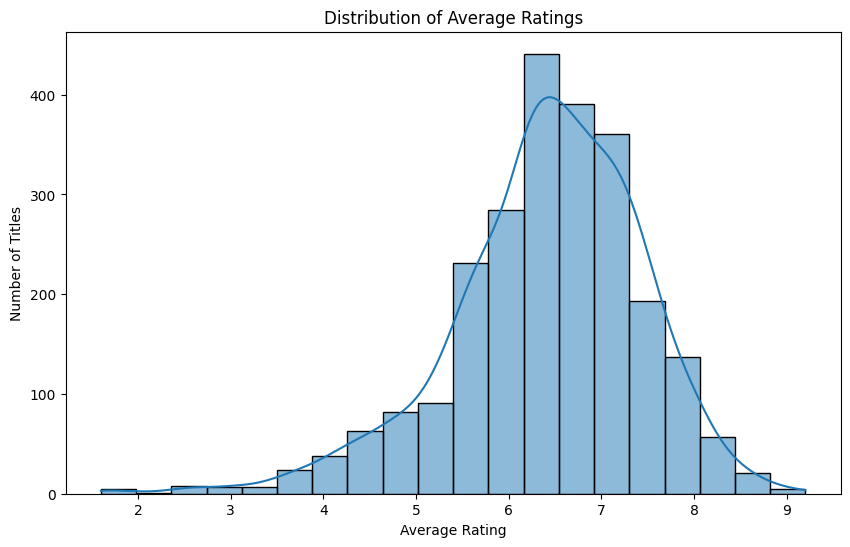

In [171]:
#plot an histogram to show if the movie rating was normally distributed
plt.figure(figsize=(10, 6))
sns.histplot(df['averagerating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Titles')
plt.show()

From the Normal distribution curve above, the movie rating is normally distributed hence we can use that as a good indicator to analyze best movies

We want to rank the movies with their rating to know which movies perfomed best. so we sort the list of movies in descending order of rating

**Analysis by movie Rating**

We then create a new list with the top rated movies. We will take a rating of 8 and above

In [172]:
#Sorting the movies by rating so as to pick the top rated movies
Sorted_movies_list = df.sort_values(by='averagerating', ascending=False)
Sorted_movies_list.head()


,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
2135,RAtt.,1800000.0,2700000.0,2017,tt1455256,The Wall,2010,78.0,Documentary,9.2,8
154,App.,3600000.0,1100000.0,2010,tt6168914,The Runaways,2019,108.0,Adventure,9.2,47
2208,UTMW,62500.0,NaN,2017,tt2831326,Tomorrow,2015,115.0,Drama,9.1,15
393,PDA,4400000.0,NaN,2011,tt6216234,The Way,2016,85.0,Documentary,9.0,9
2203,WGUSA,96800.0,NaN,2017,tt1744662,The Mayor,2011,68.0,"Comedy,Documentary,Drama",8.9,49


In [173]:
top_rated_movies = Sorted_movies_list[Sorted_movies_list['averagerating'] >= 8] # creating a list with movies with a rating above 8
#top_rated_movies.tail() running this code will sho the last
len(top_rated_movies)
print(f'The movies with a rating of 8 or above are {len(top_rated_movies)}')

The movies with a rating of 8 or above are 113


**Revenue Analysis**
This analysis was done to see if there was a particular relationship between revenue growth over time

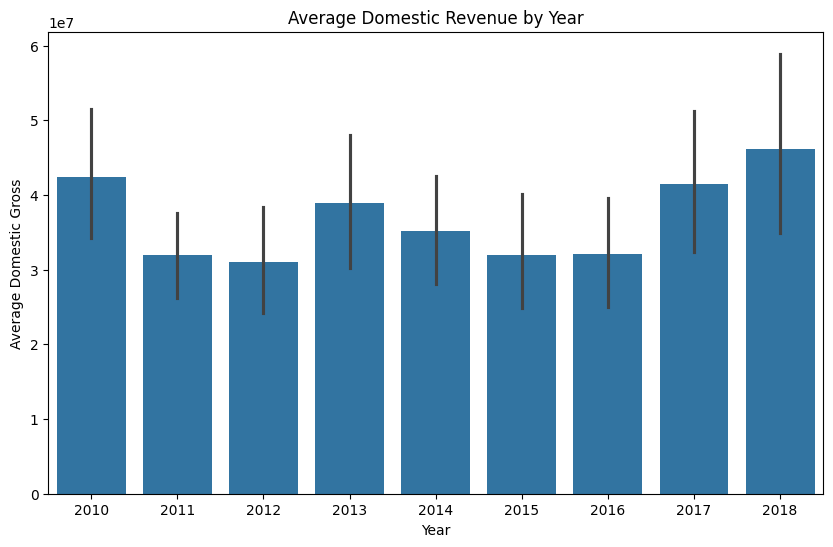

In [176]:
# Which year had the higest average domestic_gross
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='domestic_gross', data=df)
plt.title('Average Domestic Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Average Domestic Gross')
plt.show()



The code below prlots the movies data to see which genre had the best rating :

In [177]:
top_rated_movies.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
rating_grouping = top_rated_movies.groupby('genres')['averagerating'].mean().sort_values(ascending=False)
rating_grouping

genres
Adventure                      9.20
Comedy,Documentary,Drama       8.90
Documentary,History            8.70
Documentary,Music              8.65
Biography,Documentary,Sport    8.60
                               ... 
Comedy,Crime,Documentary       8.00
Biography,Drama,Music          8.00
Action,Comedy,Drama            8.00
Action,Adventure,Biography     8.00
Thriller                       8.00
Name: averagerating, Length: 61, dtype: float64

In [178]:
#Let see how many top rated movies have a genre adventure
adventure_movies = top_rated_movies[top_rated_movies['genres'].str.contains('Adventure')]
len(adventure_movies)

20

In [179]:
adventure_movies.head()

,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
154,App.,3600000.0,1100000.0,2010,tt6168914,The Runaways,2019,108.0,Adventure,9.2,47
1,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
1058,Par.,188000000.0,489400000.0,2014,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334
2232,BV,678800000.0,1369.5,2018,tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
1987,BV,209700000.0,597400000.0,2017,tt2380307,Coco,2017,105.0,"Adventure,Animation,Comedy",8.4,277194


Since adventure movies were the top rated, it is good to understand which studios had produced the best adventure movies

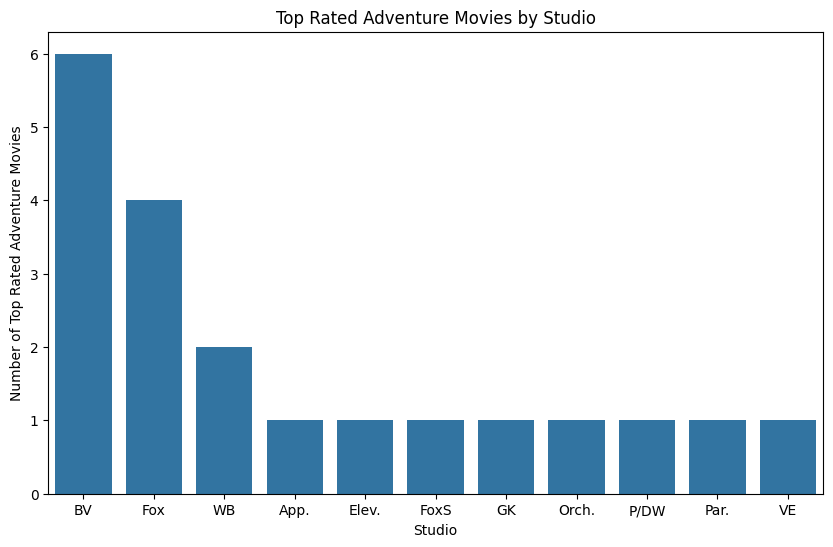

In [180]:
# Group top adveture movies by studio
adventure_studio_group = adventure_movies.groupby('studio')
#sort top adventure movies ascending
sorted_adventure_studio_group = adventure_studio_group.size().sort_values(ascending=False)
#Visualize the studions in abarplot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_adventure_studio_group.index, y=sorted_adventure_studio_group.values)
plt.title('Top Rated Adventure Movies by Studio')
plt.xlabel('Studio')
plt.ylabel('Number of Top Rated Adventure Movies')
plt.show()

In [181]:
#remove missing values from data on top rated movies
top_rated_movies = top_rated_movies.dropna()
len(top_rated_movies)
top_rated_movies.head()

,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
2135,RAtt.,1800000.0,2700000.0,2017,tt1455256,The Wall,2010,78.0,Documentary,9.2,8
154,App.,3600000.0,1100000.0,2010,tt6168914,The Runaways,2019,108.0,Adventure,9.2,47
1,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2341,Trafalgar,4200000.0,16100000.0,2018,tt9151704,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067
204,NAV,26300.0,250000.0,2010,tt1692325,Eyes Wide Open,2010,110.0,"Documentary,History",8.7,17


<function matplotlib.pyplot.show(close=None, block=None)>

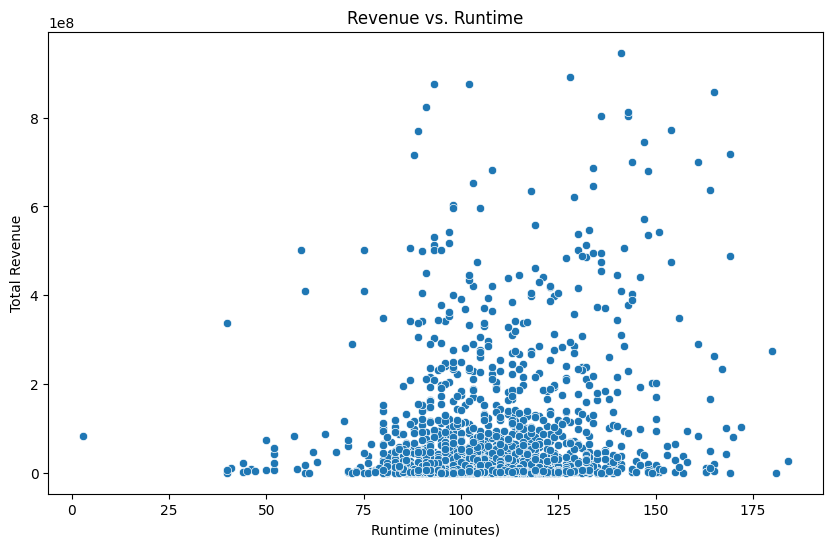

In [182]:
# We look at relationship between revenue and runtime for all the movies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime_minutes', y='foreign_gross', data=df)
plt.title('Revenue vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Total Revenue')
plt.show

In [183]:
top_rated_movies.head()

,studio,domestic_gross,foreign_gross,year,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes
2135,RAtt.,1800000.0,2700000.0,2017,tt1455256,The Wall,2010,78.0,Documentary,9.2,8
154,App.,3600000.0,1100000.0,2010,tt6168914,The Runaways,2019,108.0,Adventure,9.2,47
1,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2341,Trafalgar,4200000.0,16100000.0,2018,tt9151704,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067
204,NAV,26300.0,250000.0,2010,tt1692325,Eyes Wide Open,2010,110.0,"Documentary,History",8.7,17
